In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#Bunch object works similar to a dictionary.
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target.shape

(569,)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names.shape

(30,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape = (D, ), activation = 'sigmoid'))
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 2s 50ms/step - loss: 0.8935 - accuracy: 0.5381 - val_loss: 0.9136 - val_accuracy: 0.4840
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8234 - accuracy: 0.5827 - val_loss: 0.8322 - val_accuracy: 0.5479
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.7596 - accuracy: 0.6378 - val_loss: 0.7615 - val_accuracy: 0.6064
Epoch 4/100
12/12 [==============================] - 0s 11ms/step - loss: 0.7056 - accuracy: 0.6640 - val_loss: 0.6987 - val_accuracy: 0.6277
Epoch 5/100
12/12 [==============================] - 0s 16ms/step - loss: 0.6560 - accuracy: 0.6877 - val_loss: 0.6449 - val_accuracy: 0.6489
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6148 - accuracy: 0.7034 - val_loss: 0.5967 - val_accuracy: 0.6862
Epoch 7/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5763 - accuracy: 0.7375 - val_loss: 0.5552 - val_accuracy: 0.7234
Epoch 8/

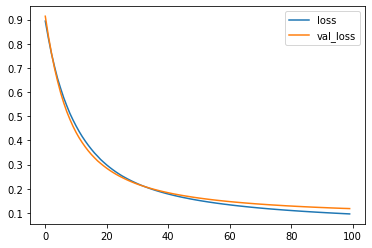

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

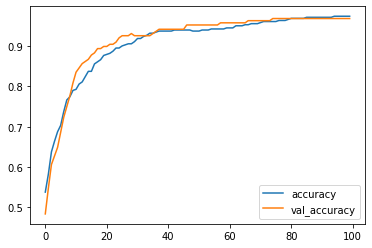

In [ ]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [ ]:
#Making Predictions:
P = model.predict(X_test)
print(P)

[[7.11663067e-02]
 [9.82383192e-01]
 [8.88796091e-01]
 [9.81458545e-01]
 [1.27501485e-08]
 [5.38724661e-02]
 [9.45502460e-01]
 [4.33002114e-02]
 [1.91986561e-04]
 [5.70380211e-01]
 [9.88023281e-01]
 [9.98282433e-01]
 [7.66758561e-01]
 [9.87783611e-01]
 [9.93554473e-01]
 [9.60908175e-01]
 [9.97904181e-01]
 [9.65080142e-01]
 [9.93818283e-01]
 [9.86477137e-01]
 [4.52490211e-01]
 [9.98923898e-01]
 [3.81648540e-04]
 [2.70374417e-02]
 [7.00569689e-01]
 [1.02731625e-04]
 [9.97713327e-01]
 [1.14536583e-02]
 [3.85194123e-02]
 [9.39850807e-01]
 [9.83410239e-01]
 [9.68061149e-01]
 [1.59122348e-01]
 [8.21948707e-01]
 [5.69084585e-02]
 [1.53832138e-02]
 [9.99730825e-01]
 [1.10949367e-01]
 [9.94272470e-01]
 [7.64650540e-05]
 [9.95350122e-01]
 [4.42052260e-05]
 [9.81026292e-01]
 [9.15459216e-01]
 [8.76192927e-01]
 [7.16020644e-01]
 [9.97978985e-01]
 [9.98834014e-01]
 [9.57033277e-01]
 [8.52615595e-01]
 [7.69639492e-01]
 [9.77938414e-01]
 [1.82229560e-05]
 [5.23632169e-02]
 [9.30082798e-03]
 [1.524968

In [ ]:
import numpy as np
P = np.round(P).flatten() #In case of multiple outputs, the Dense layer defaults to a 2D array, we hence flatten it to a 1D vector of size N.
print(P)

[0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.]


In [ ]:
print('Manually Calculated Accuracy: ', np.mean(P == y_test))
print('Evaluated Output: ', model.evaluate(X_test, y_test))

Manually Calculated Accuracy:  0.9680851063829787
6/6 [==============================] - 0s 4ms/step - loss: 0.1180 - accuracy: 0.9681
Evaluated Output:  [0.11804132163524628, 0.9680851101875305]


In [ ]:
#Saving the model:
model.save("linear_classifier.h5")

In [ ]:
ls

linear_classifier.h5  sample_data/


In [ ]:
model = tf.keras.models.load_model("linear_classifier.h5")
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.1180 - accuracy: 0.9681


[0.11804132163524628, 0.9680851101875305]